Forecasting is a common statistical task in business, where it helps to inform decisions about the scheduling of production, transportation and personnel, and provides a guide to long-term strategic planning. In this kernal we are predicting the future value of Bitcoins. 

The appropriate forecasting methods depend largely on what data are available.

If there are no data available, or if the data available are not relevant to the forecasts, then ** qualitative forecasting** methods must be used.

**Quantitative forecasting ** can be applied when two conditions are satisfied:
1. Numerical information about the past is available;
2. It is reasonable to assume that some aspects of the past patterns will continue into the future.

With **cross-sectional data**, we are wanting to predict the value of something we have not observed, using the information on the cases that we have observed. 

**Time series forecasting. **Time series data are useful when you are forecasting something that is changing over time (e.g., stock prices, sales figures, profits, etc.). 
 

This specific kernal notebook is intended to provide various insight on the Bitcoin Dataset and give knowledege about varied statistical methods of forecasting that could be used to gain insight of the bitcoin dataset provided in the "Bitcoin Price Prediction (LightWeight CSV) Build Model from Market Data" By Team AI.

Let's start by importing necessary libraries that we will utilize in this notebook.

In [1]:
library(anytime)
library(xts)
library(hts)
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: forecast


**anytime library**: These function use the Boost Date_Time library to parse datetimes (and dates) from strings, integers, factors or even numeric values (which are cast to strings internally). They return a vector of POSIXct objects (or Date objects in the case of anydate).

**xts library**: Constructor function for creating an extensible time-series object.
xts is used to create an xts object from raw data inputs.

**hts library**: Method for creating hierarchical time series.

**forecast**: Forecast is a generic function for forecasting from time series or time series models. The function invokes particular methods which depend on the class of the first argument.

Let's load the input file which is the training file provided in the bitcoin dataset

In [2]:
train = read.csv("../input/bitcoin_price_Training - Training.csv")

Then let us list down few elements of our traning data to look at how the bitcoin dataset looks like using the head function.

In [3]:
head(train)

Date,Open,High,Low,Close,Volume,Market.Cap
"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
"Jul 26, 2017",2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000"


The data consists of 7 columns as per above sample we obtained. The easiest way to obtain the column names of our data set which will also serve as the name of features can be extracted as below:

In [4]:
colnames(train)

[1] "Date"       "Open"       "High"       "Low"        "Close"     
[6] "Volume"     "Market.Cap"

Now that we have the sample data from our training file and we also have the column names. 
Next let's try to fetch some satistics and summary of the data:

In [5]:
summary(train)

           Date           Open             High              Low         
 Apr 01, 2014:   1   Min.   :  68.5   Min.   :  74.56   Min.   :  65.53  
 Apr 01, 2015:   1   1st Qu.: 254.3   1st Qu.: 260.33   1st Qu.: 248.84  
 Apr 01, 2016:   1   Median : 438.6   Median : 447.56   Median : 430.57  
 Apr 01, 2017:   1   Mean   : 582.6   Mean   : 597.99   Mean   : 567.85  
 Apr 02, 2014:   1   3rd Qu.: 662.4   3rd Qu.: 674.52   3rd Qu.: 646.74  
 Apr 02, 2015:   1   Max.   :2953.2   Max.   :2999.91   Max.   :2840.53  
 (Other)     :1550                                                       
     Close                   Volume             Market.Cap  
 Min.   :  68.43   -            : 243   1,229,100,000:   2  
 1st Qu.: 254.32   1,064,730,000:   1   3,314,640,000:   2  
 Median : 438.86   1,072,840,000:   1   3,329,190,000:   2  
 Mean   : 584.24   1,080,030,000:   1   3,562,790,000:   2  
 3rd Qu.: 663.40   1,097,940,000:   1   1,000,070,000:   1  
 Max.   :2958.11   1,111,200,000:   1   1,

That's great now we know all about the data that we should conclude at first glance.
The data indeed needs some cleaning before we can start using it for statistical purpose so let's proceed with some data cleaning

The very first inevitable task to make date usable. Let's proceed with extraction of date:

In [6]:
train$Date = as.Date(anytime(train$Date))

In [7]:
head(train)

Date,Open,High,Low,Close,Volume,Market.Cap
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-26,2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000"


As seen above the date is now in date format and can be used for analytics.
The Volume and Market.Cap appear as string so we need to convert it to numeric.
On careful analysis it is also observed that Volume has missing data which makes our data sparse. In such a scenario either we can fill the missing values or we can ignore the rows. Ignoring roles gives heavy loss of information which I personally do not recommend. The approach we adobt here is to ignore the column as it is not very useful feature to us as compared to open, high, low and close.

In [8]:
train$Date = as.Date(anytime(train$Date))
train$Volume = gsub(',','',train$Volume)
train$Market.Cap = gsub(',','',train$Market.Cap)
train$Volume <- NULL
train$Market.Cap = as.numeric(train$Market.Cap)
head(train)

Date,Open,High,Low,Close,Market.Cap
2017-07-31,2763.24,2889.62,2720.61,2875.34,45535800000
2017-07-30,2724.39,2758.53,2644.85,2757.18,44890700000
2017-07-29,2807.02,2808.76,2692.80,2726.45,46246700000
2017-07-28,2679.73,2897.45,2679.73,2809.01,44144400000
2017-07-27,2538.71,2693.32,2529.34,2671.78,41816500000
2017-07-26,2577.77,2610.76,2450.80,2529.45,42455000000


Before we perform any statistics let's convert our data into xts and order by dates

In [9]:
Train = xts(train[, -1], order.by=as.POSIXct(train$Date))

In [10]:
head(Train)

             Open   High    Low  Close Market.Cap
2013-04-28 135.30 135.98 132.10 134.21 1500520000
2013-04-29 134.44 147.49 134.00 144.54 1491160000
2013-04-30 144.00 146.93 134.05 139.00 1597780000
2013-05-01 139.00 139.89 107.72 116.99 1542820000
2013-05-02 116.38 125.60  92.28 105.21 1292190000
2013-05-03 106.25 108.13  79.10  97.75 1180070000

Some forecasting methods are very simple and surprisingly effective. Here are four methods that we will use as benchmarks for other forecasting methods.

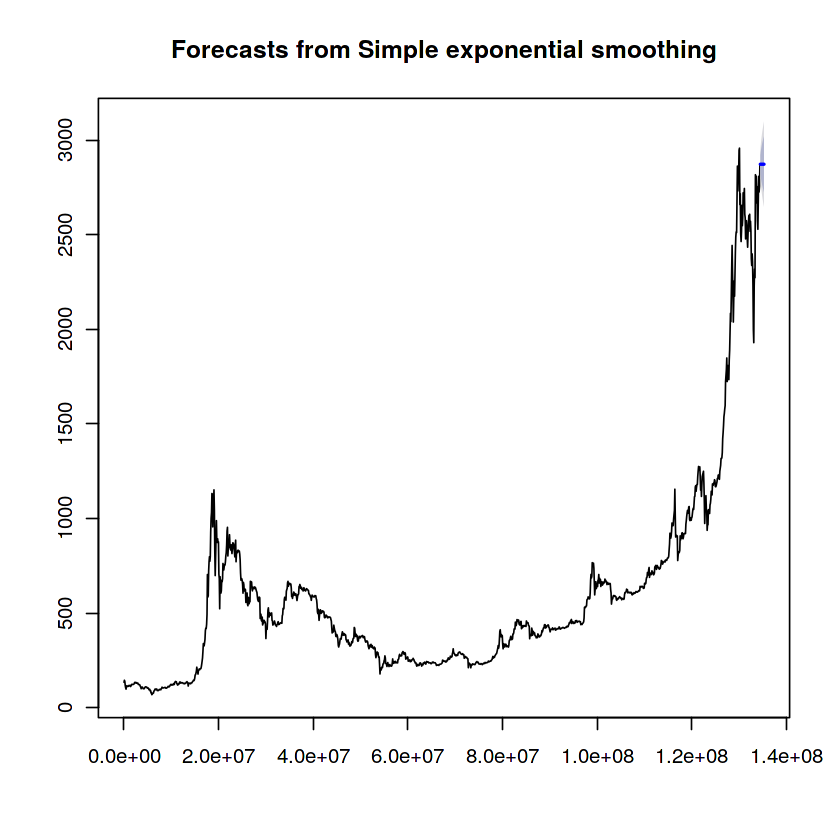

In [11]:
plot(ses(Train[,'Close']))

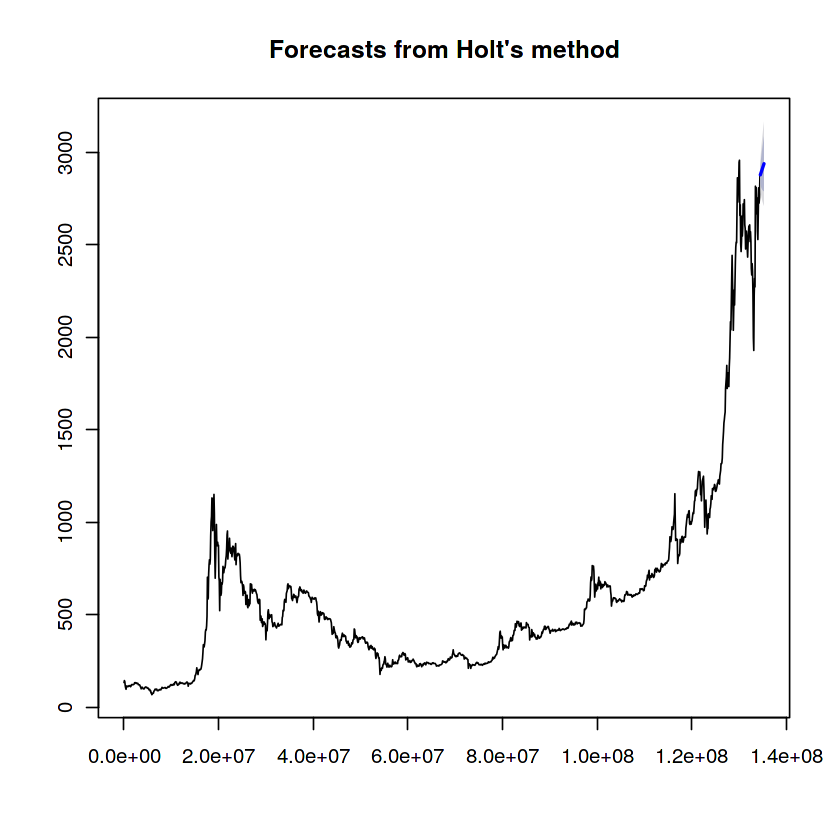

In [12]:
plot(holt(Train[,'Close'])) 

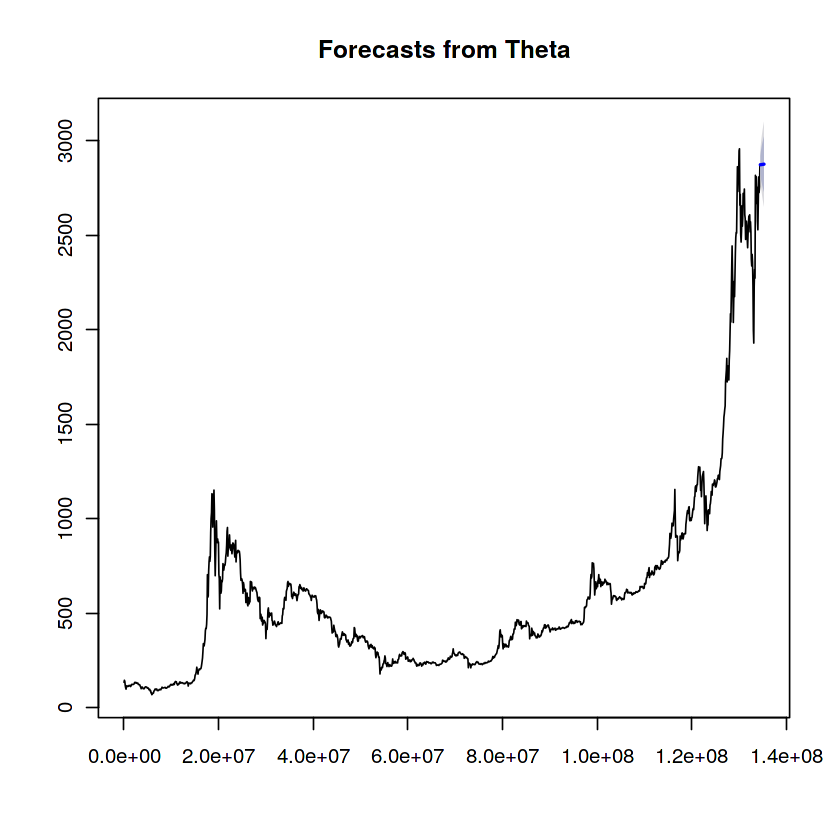

In [13]:
plot(thetaf(Train[,'Close']))

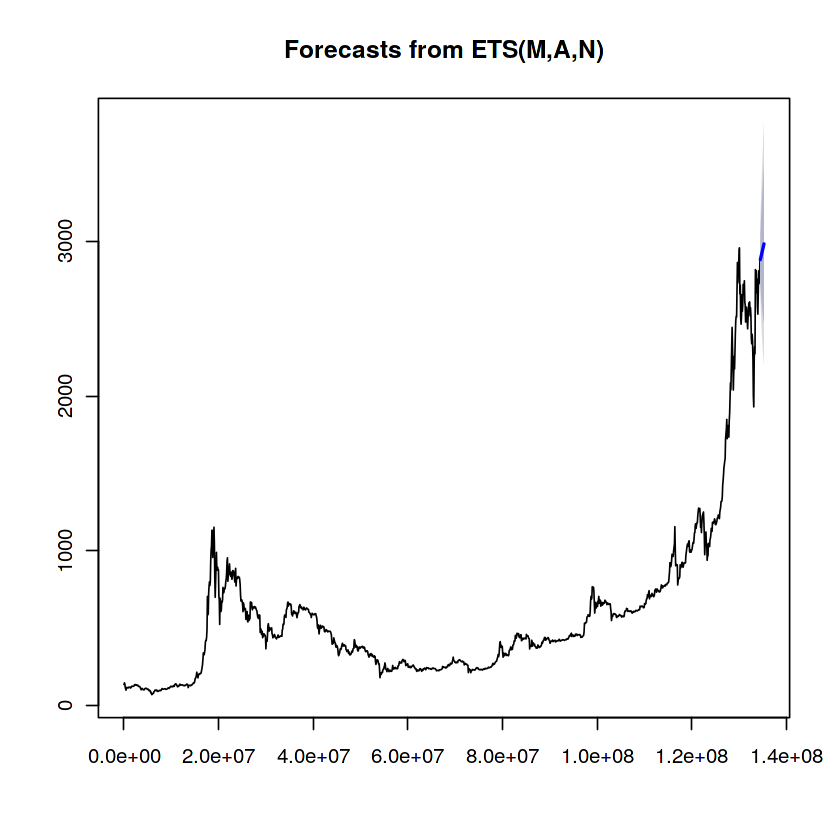

In [14]:
plot(forecast(Train[,'Close']))

Introduction to multiple linear regression
The general form of a multiple regression is
yi=β0+β1x1,i+β2x2,i+⋯+βkxk,i+ei,
where yi is the variable to be forecast and x1,i,…,xk,i are the k predictor. Each of the predictor variables must be numerical. The coefficients β1,…,βk measure the effect of each predictor after taking account of the effect of all other predictors in the model. Thus, the coefficients measure the marginal effects of the predictor variables.

Lets get a general trend our closing price follows

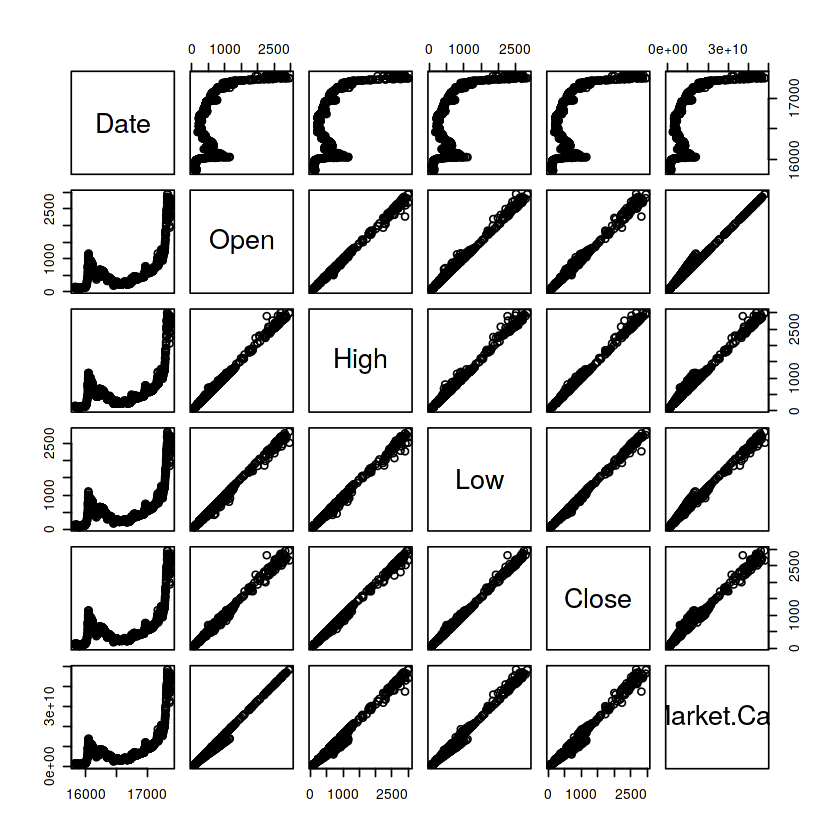

In [15]:
plot(train)

Let's fit the regression

In [16]:
bitcoin  <- data.frame(close=train$Close,
                         open=log(train$Open+1),
                         high=log(train$High),
                         low=log(train$Low+1),
                         market=log(train$Market.Cap+1))
fit <- step(lm(close ~ open  + high 
               + low + market, data=bitcoin))

Start:  AIC=17222.34
close ~ open + high + low + market

         Df Sum of Sq       RSS   AIC
- low     1     22262  99136733 17221
<none>                 99114471 17222
- open    1    199086  99313557 17224
- market  1    465750  99580220 17228
- high    1   2782727 101897198 17263

Step:  AIC=17220.69
close ~ open + high + market

         Df Sum of Sq       RSS   AIC
<none>                 99136733 17221
- open    1    305413  99442146 17224
- market  1    588708  99725441 17228
- high    1   2772470 101909203 17262


In [17]:
summary(fit)


Call:
lm(formula = close ~ open + high + market, data = bitcoin)

Residuals:
    Min      1Q  Median      3Q     Max 
-481.82 -147.61  -94.75   56.15 1212.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    352.5     1148.1   0.307  0.75887    
open          -525.0      240.1  -2.187  0.02892 *  
high          1373.2      208.4   6.588 6.08e-11 ***
market        -219.8       72.4  -3.036  0.00244 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 252.7 on 1552 degrees of freedom
Multiple R-squared:  0.7695,	Adjusted R-squared:  0.769 
F-statistic:  1727 on 3 and 1552 DF,  p-value: < 2.2e-16


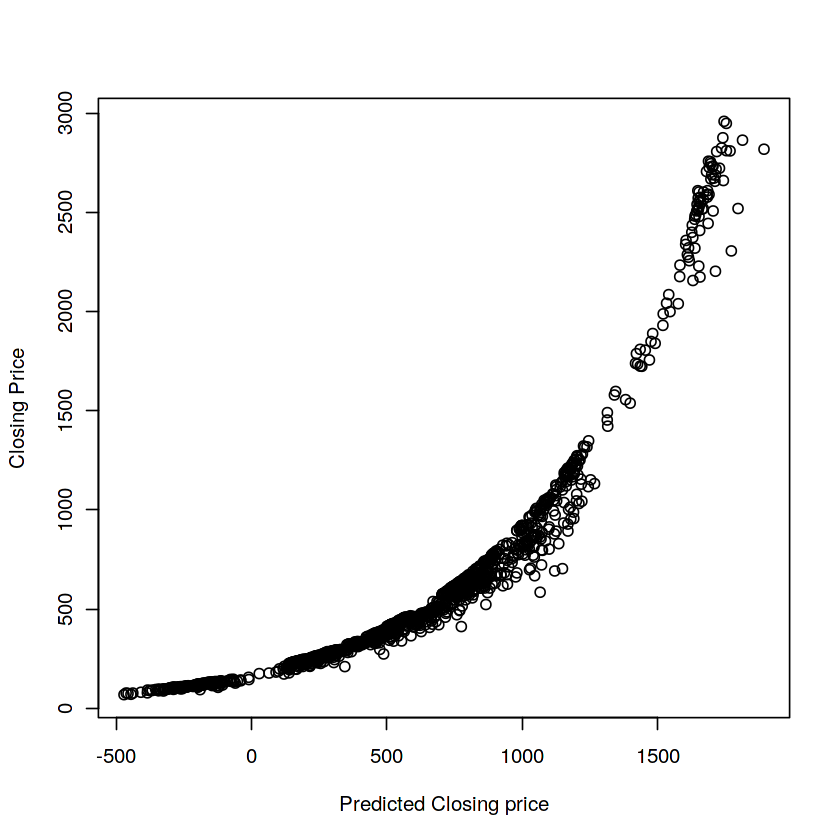

In [18]:
plot(fitted(fit), bitcoin$close,ylab="Closing Price", xlab="Predicted Closing price")

Next let's use the exponential smoothening
The most common is Holt's linear trend method
Holt (1957) extended simple exponential smoothing to allow forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend):
![](https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/images/graphics/as_smoothing.gif)


Let's fit the holt's exponential smoothening

In [19]:
m <- HoltWinters(Train[,'Close'], gamma = FALSE)

Warning message in HoltWinters(Train[, "Close"], gamma = FALSE):
“optimization difficulties: ERROR: ABNORMAL_TERMINATION_IN_LNSRCH”

Warning message in plot.window(xlim, ylim, log, ...):
“"fcol" is not a graphical parameter”Warning message in plot.window(xlim, ylim, log, ...):
“"plot.conf" is not a graphical parameter”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"fcol" is not a graphical parameter”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"plot.conf" is not a graphical parameter”Warning message in axis(1, ...):
“"fcol" is not a graphical parameter”Warning message in axis(1, ...):
“"plot.conf" is not a graphical parameter”Warning message in axis(2, ...):
“"fcol" is not a graphical parameter”Warning message in axis(2, ...):
“"plot.conf" is not a graphical parameter”Warning message in box(...):
“"fcol" is not a graphical parameter”Warning message in box(...):
“"plot.conf" is not a graphical parameter”

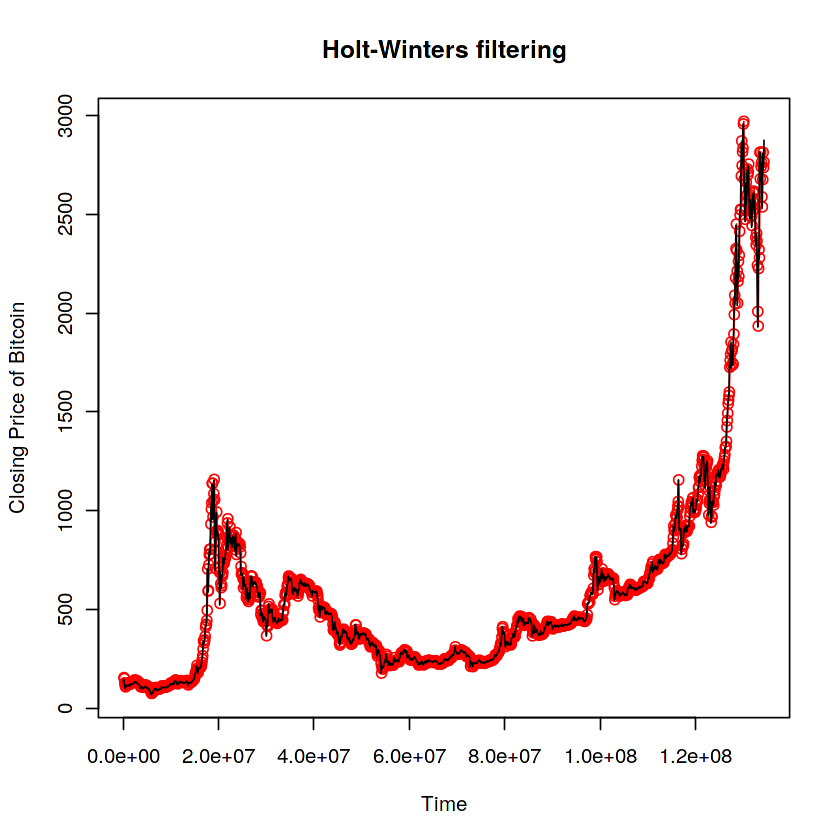

In [20]:
plot(m, type="o", ylab="Closing Price of Bitcoin", xlab="Time", fcol="white", plot.conf=FALSE)

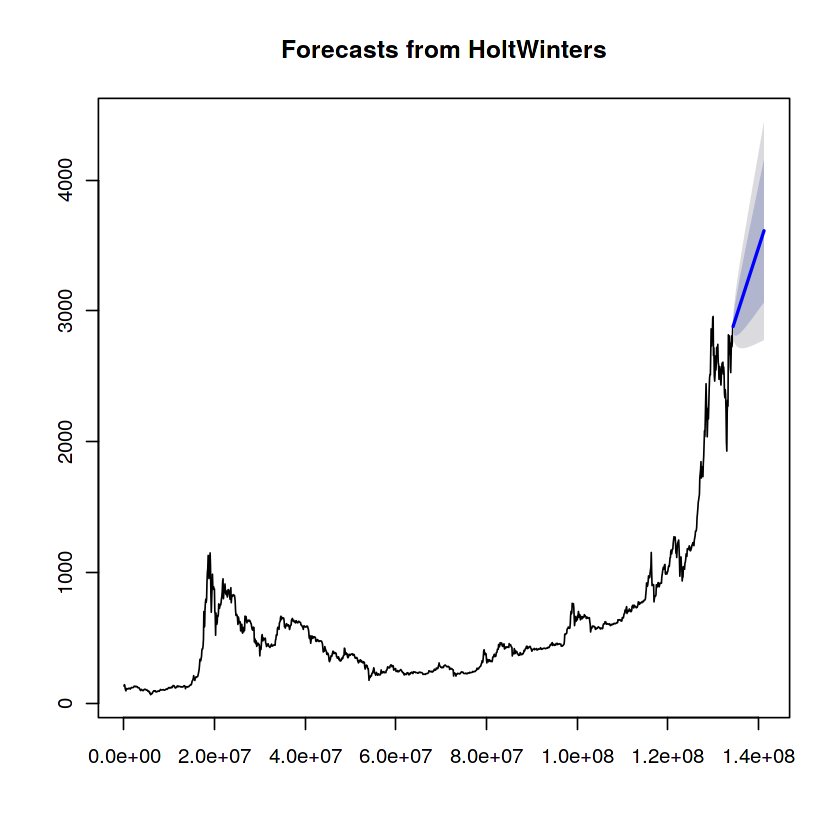

In [21]:
plot(forecast(m,h=80))

ARIMA models provide another approach to time series forecasting. Exponential smoothing and ARIMA models are the two most widely-used approaches to time series forecasting, and provide complementary approaches to the problem. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

Let's model our arima using auto.arima function that selects the best fit for arima

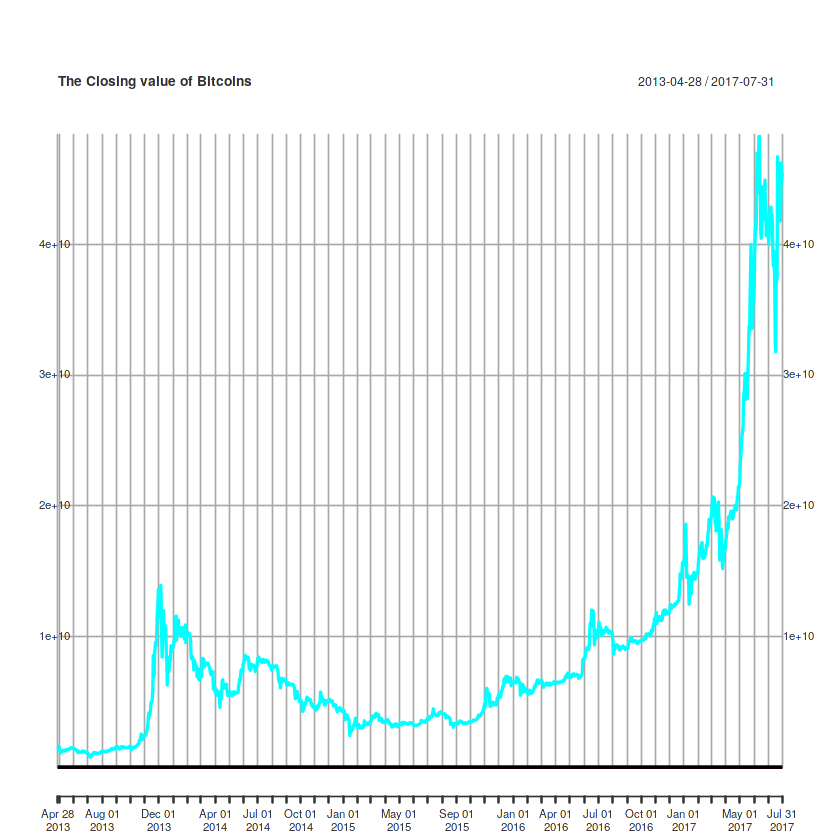

In [22]:
plot(Train, xlab="Year",main="The Closing value of Bitcoins")

Deprecated, use residuals.Arima(object, type='regression') instead


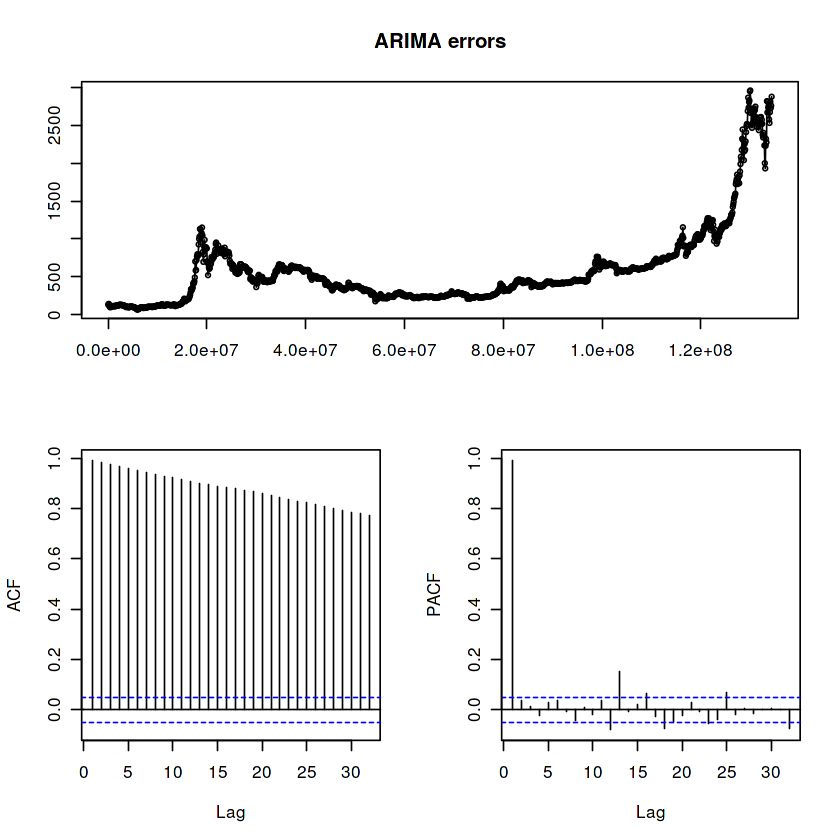

In [23]:
fit = auto.arima(Train[,"Close"])
tsdisplay(arima.errors(fit), main="ARIMA errors")

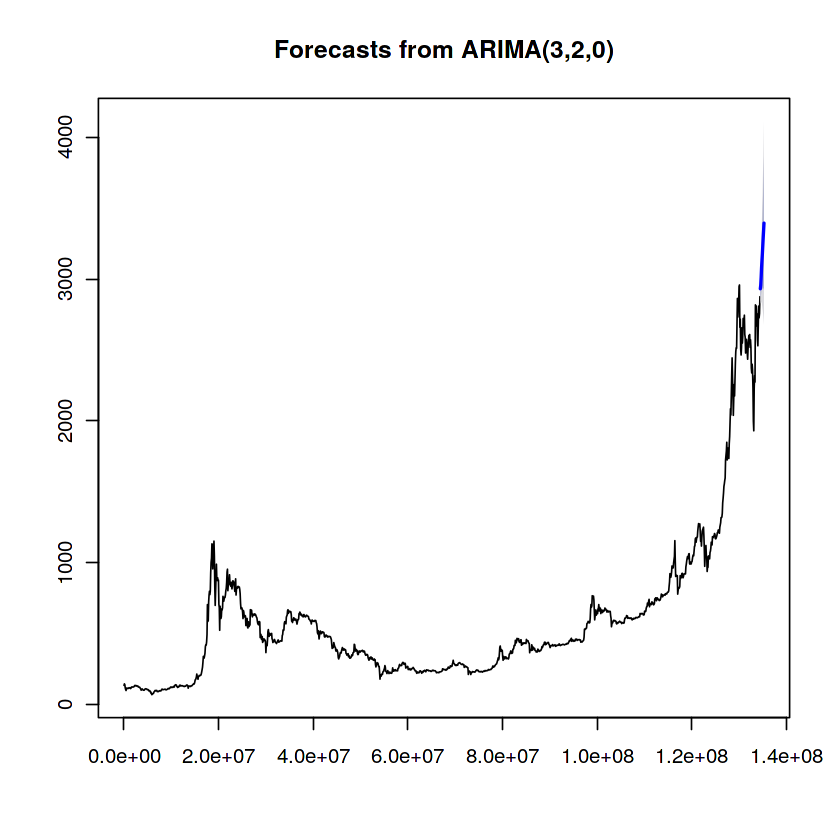

In [24]:
plot(forecast(fit))

Lastly In this section we present alternative approaches for forecasting time series data that possess hierarchical structures. This forecast uses advanced forecasting methods like "Forecasting hierarchical or grouped time series"

The total number of series in a hierarchy is given by n=1+n1+⋯+nK where ni is the number of series at level i of the hierarchy.


Since argument characters are not specified, the default labelling system is used.


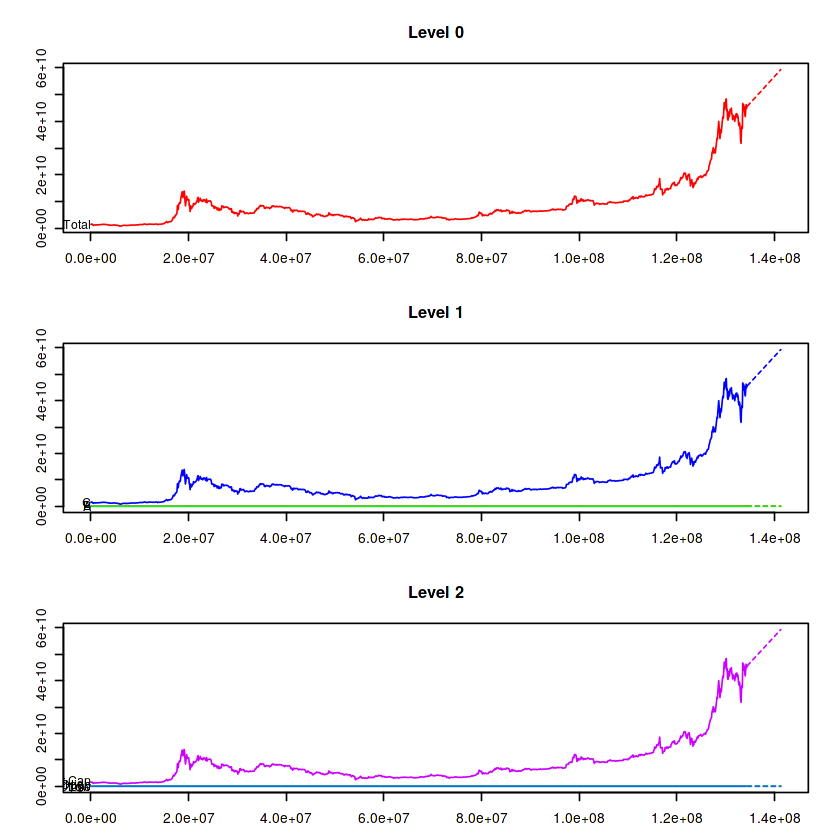

In [25]:
y <- hts(Train,  nodes=list(3, c(3,1,1)))
allf <- forecast(y, h=80)
plot(allf)

This notebook has tried to touch a sample of each technique that can be used to forecast the data. The various tuning of hyperprameters and appropriate feature engineering indeed will improve each model significantly.